In [13]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

num_classes = 10
input_shape = x_train.shape[1:]

inputs = Input(shape=input_shape)

x = inputs
for _ in range(4):  # 4 blocks
    for _ in range(3):  # 3 Conv2D → relu → BN
        x = Conv2D(64, (3, 3), padding='same', strides=1)(x)
        x = Activation('relu')(x)
        x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=2)(x)
    x = Dropout(0.3)(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs, outputs)

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_48 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 activation_48 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 batch_normalization_48 (Ba  (None, 32, 32, 64)        256       
 tchNormalization)                                               
                                                                 
 conv2d_49 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 activation_49 (Activation)  (None, 32, 32, 64)        0         
                                                           

Epoch 1/30
391/391 [==============================] - 27s 50ms/step - loss: 1.8013 - accuracy: 0.3422 - val_loss: 3.0188 - val_accuracy: 0.1507
Epoch 2/30
391/391 [==============================] - 19s 48ms/step - loss: 1.2832 - accuracy: 0.5329 - val_loss: 1.4504 - val_accuracy: 0.5052
Epoch 3/30
391/391 [==============================] - 18s 47ms/step - loss: 1.0206 - accuracy: 0.6376 - val_loss: 0.9803 - val_accuracy: 0.6555
Epoch 4/30
391/391 [==============================] - 18s 47ms/step - loss: 0.8707 - accuracy: 0.6977 - val_loss: 1.2001 - val_accuracy: 0.6316
Epoch 5/30
391/391 [==============================] - 19s 48ms/step - loss: 0.7678 - accuracy: 0.7348 - val_loss: 0.7664 - val_accuracy: 0.7341
Epoch 6/30
391/391 [==============================] - 19s 48ms/step - loss: 0.6921 - accuracy: 0.7615 - val_loss: 0.7009 - val_accuracy: 0.7589
Epoch 7/30
391/391 [==============================] - 19s 48ms/step - loss: 0.6355 - accuracy: 0.7830 - val_loss: 0.7515 - val_accuracy:

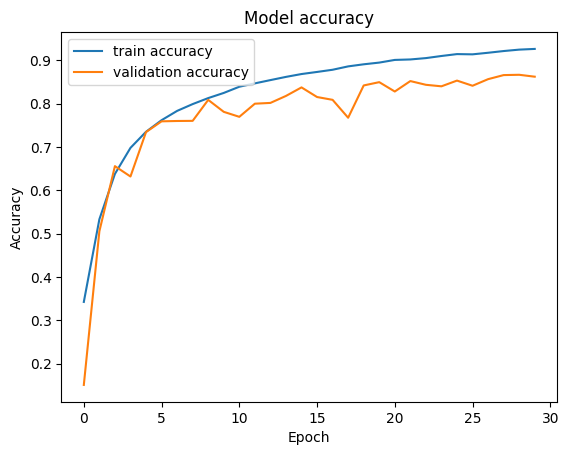

In [14]:
import matplotlib.pyplot as plt
history = model.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc*100:.2f}%")

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

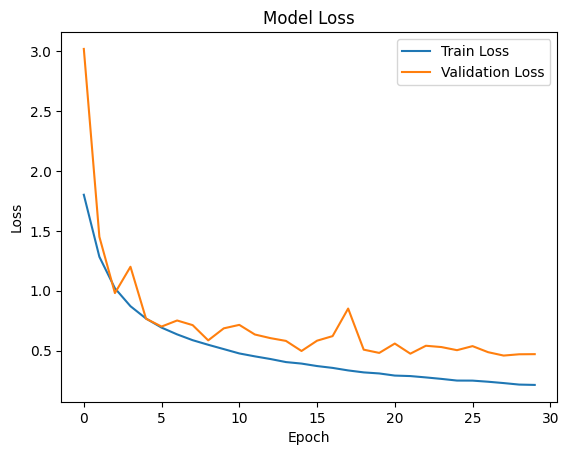

In [15]:
# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()